In [58]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################


(406, 9)


# Preprocess

In [59]:
# Create a new dataframe based on old one and fixed some rows car_name
new_data = data.copy()
# Create a company name
wrong_name = ['toyouta', 'chevroelt', 'chevy', 'mercedes-benz', 'vw', 'vokswagen', 'maxda']
correct_name = ['toyota', 'chevrolet', 'chevrolet', 'mercedes', 'volkswagen', 'volkswagen', 'mazda']

for i, j in zip(wrong_name, correct_name):
    new_data['car_name'] = new_data['car_name'].str.replace(i, j)

new_data['car_company'] = new_data['car_name'].str.split(' ').apply(lambda x: x[0])

new_data = new_data[new_data['car_company'] != 'hi']

1. How many cars and how many attributes are in the data set.

In [60]:
print('Number of cars:', data.shape[0])
print('Number of attributes:', data.shape[1])

Number of cars: 406
Number of attributes: 9


2. How many distinct car companies are represented in the data set? What is the name of the car with the best MPG? What car company produced the most 8-cylinder cars? What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

In [70]:
print('Number of distinct car companies:', new_data['car_company'].nunique())
print('Name of the car with the best MPG:',data.iloc[data['mpg'].argmax()]['car_name'])
t = new_data[['car_company', 'cylinders']][new_data['cylinders'] == 8]\
    .groupby(by=['car_company']).agg(['count'])
print('Car company produced the most 8-cylinder cars:', t.iloc[t.values.argmax()].name)
print('Names of 3-cylinder cars:')
for i in new_data['car_name'][new_data['cylinders'] == 3]:
    print(' - ',i)

Number of distinct car companies: 30
Name of the car with the best MPG: mazda glc
Car company produced the most 8-cylinder cars: ford
Names of 3-cylinder cars:
 -  mazda rx2 coupe
 -  mazda rx3
 -  mazda rx-4
 -  mazda rx-7 gs


- 3-cylinder cars were available in the ‘80s and early ‘90s, their low power and high levels of vibration left a lot to be desired.

3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential
missing values.

In [62]:
new_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,397.000000,405.000000,405.000000,399.000000,405.000000,405.000000,405.000000,405.000000
mean,23.551134,5.469136,194.509877,104.862155,2975.086420,15.512346,75.935802,1.570370
std,7.791697,1.709658,104.911254,38.565855,843.546368,2.802897,3.741767,0.797962
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.500000,2226.000000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2815.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.500000,3613.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [63]:
print('Potential missing values:')
print(data.isna().sum())

Potential missing values:
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64


4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins.
Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

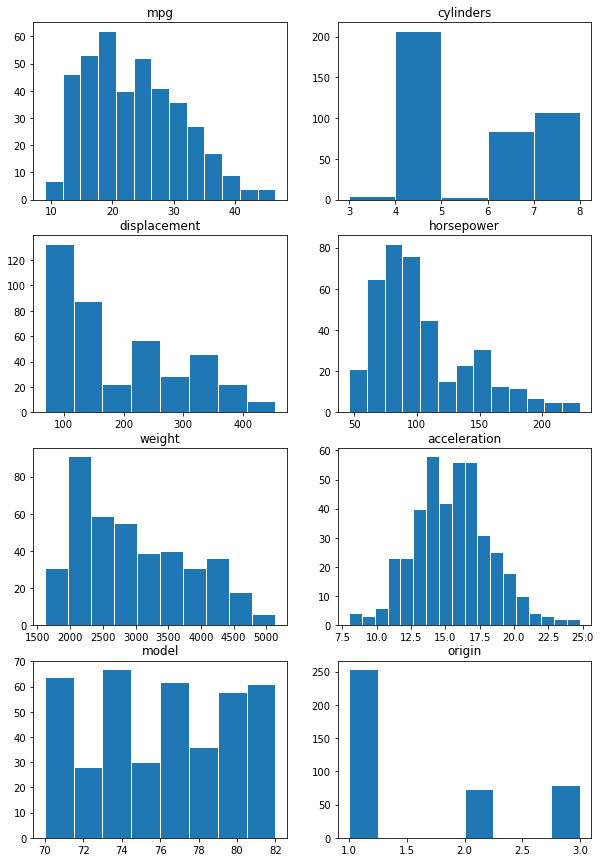

In [73]:
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
cols = data.columns[:-1]
for i in range(4):
    for j in range(2):
        t = data[cols[i*2 + j]]
        # Freedman-Diaconis rule
        # Choose number of bins for histogram plot
        q1 = t.quantile(0.25)
        q3 = t.quantile(0.75)
        iqr = q3 - q1
        bin_width = (2 * iqr) / (len(t) ** (1 / 3))
        bin_count = int(np.ceil((t.max() - t.min()) / bin_width))
        axes[i][j].hist(t, bins=bin_count, edgecolor='w')
        axes[i][j].set_title(cols[i*2 + j])

- The distribution of acceleration is similar to a normal distribution and most of the values are in between 12.5 and 20
- The distributions of mpg, displacement, horsepower and weight are skewed to the right
- The distribution of cylinders shows that most of the cars in the dataset have 4 cylinders

5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship
between the attributes? What is the correlation coefficient between the 2 attributes?

Correlation coefficient: -0.8749473981990712


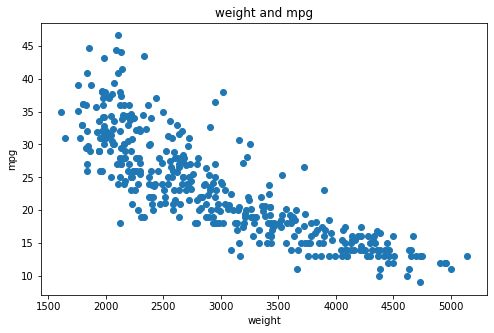

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data['weight'], data['mpg']);
ax.set_xlabel('weight')
ax.set_ylabel('mpg')
ax.set_title('weight and mpg')
print('Correlation coefficient:', data[['weight','mpg']].corr(method='spearman').iloc[0, 1])

- Weigth and mpg of a car have a negative correlation.
- We can easily understand that the weight of a car will greatly affects the amount of fuel it uses
- The decreasing rate of mpg when the weight increases becomes lower because some cars with higher weight might also have some fuel-saving mechanisms.

6. Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make
the scatterplot look nicer. What can you conclude? Do some internet search about the history of car
industry during 70’s that might explain the results.(Hint: data.mpg + np.random.random(len(data.mpg))
will add small random noise)

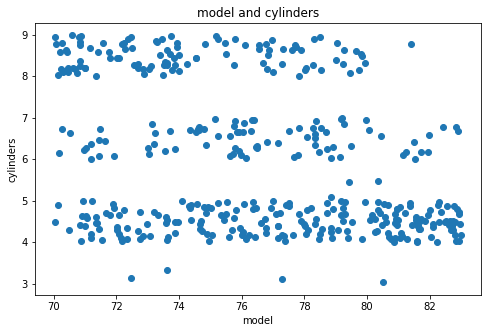

In [66]:
x = data['model'] + np.random.random(len(data['model']))
y = data['cylinders'] + np.random.random(len(data['cylinders']))

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y)
ax.set_xlabel('model')
ax.set_ylabel('cylinders')
ax.set_title('model and cylinders');

- Lots of cars with 4 cylinders were introduced during 70s and 82s
- The number of 4-cylinders cars gradually increased while the number of 8-cylinders cars decreased
- There was almost no new car with 8 or higher cylinders introduced from 1980 to 1982
- The nubmer of 6 or 7-cylinders cars kept the same trend over the time provided in the dataset

By the beginning of 1970, Japanese automakers were ready to show off the fun and affordable sports cars they had that could rival anything in the world. Over the next two decades, a slow arms race developed among Nissan, Toyota, Honda, Mazda, and others. The Japanese companies eventually created a “gentlemen’s agreement” of sorts to limit published hp to under 276, and to keep the cars under the level of true supercars. Heading into the 1990s, that all fell apart. The Toyota Supra and Nissan 300ZX had evolved well beyond anything offered in America at that time in terms of sophistication and real-world performance.

7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

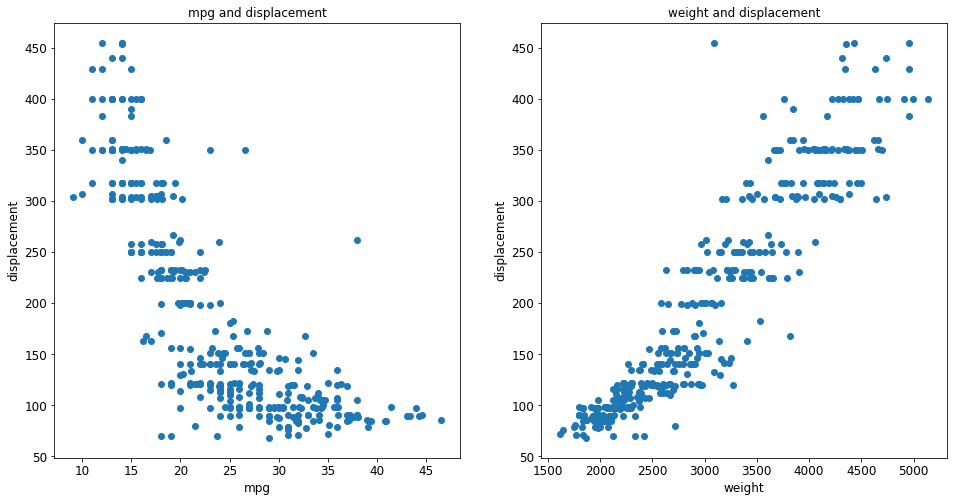

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(data['mpg'], data['displacement']);
ax1.set_xlabel('mpg', fontsize=12)
ax1.set_ylabel('displacement', fontsize=12);
ax1.tick_params('both', labelsize=12)
ax1.set_title('mpg and displacement')

ax2.scatter(data['weight'], data['displacement'])
ax2.set_xlabel('weight', fontsize=12)
ax2.set_ylabel('displacement', fontsize=12)
ax2.tick_params('both', labelsize=12)
ax2.set_title('weight and displacement');

- Scatter plot 1 shows that a car's displacement and mpg have a negative correlation. This is the proof that low displacement will make it highly fuel-efficient which is why mpg increases when displacement decreases
- Scatter plot 2 shows that the weight of a car is proportional to its displacement. This is true because the higher the displacement is, the more efficient a car's performance is. As a result, to handle that performance, more equipments and parts must be integrated into the car.

8. Plot a time series for all the companies that show how many new cars they introduces during
each year. Do you see some interesting trends? (Hint: data.car_name.str.split()[0] returns
a vector of the first word of car name column.)

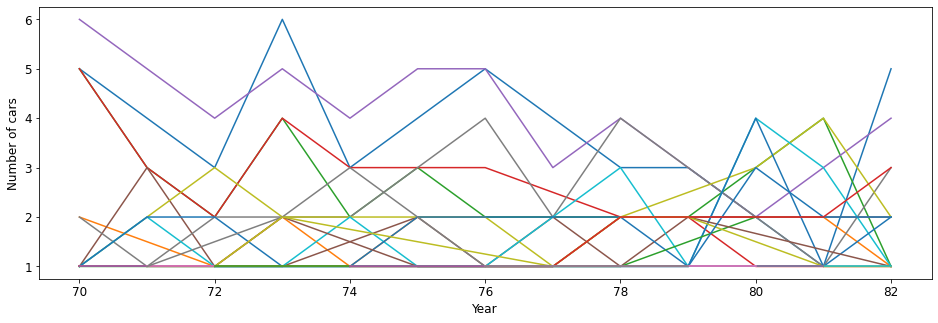

In [78]:
fig, ax = plt.subplots(figsize=(16, 5))
car_company = new_data['car_company'].unique()
for c in car_company:
    t = new_data['model'][new_data['car_company'] == c].value_counts().sort_index()
    ax.plot(t.index, t.values)
ax.set_ylabel('Number of cars', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.tick_params(labelsize=12);

- In general, the trend had been volatile but gradually became stable during the latest years
- By the way, no specific trend can be inferred from the time series 

9. Calculate the pairwise correlation, and draw the heatmap with Matplotlib. Do you see some
interesting correlation? (Hint: data.iloc[:,0:8].corr(), plt.pcolor() draws the heatmap.)

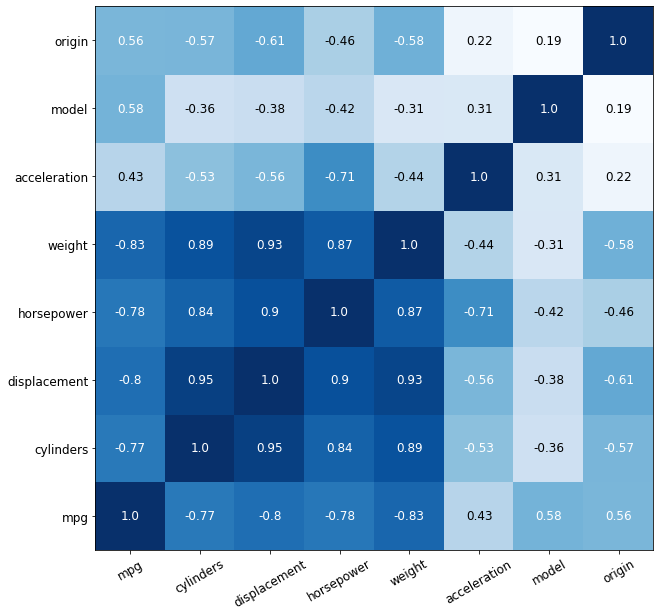

In [82]:
corr = new_data.iloc[:, :8].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolor(np.abs(corr), cmap='Blues')

# Set ticks
ax.set_xticks(0.5 + np.arange(corr.shape[0]), corr.columns)
ax.set_yticks(0.5 + np.arange(corr.shape[0]), corr.columns)

for i in range(corr.shape[0]):
    for j in range(corr.shape[0]):
        value = np.round(corr.iloc[i, j], 2)
        # Change color of the text for eye pleasing experience
        if np.abs(value) < 0.5:
            c = 'black'
        else: c = 'w'
        # Annotation
        ax.text(
            0.5 + i, 0.5 + j, 
            value, 
            fontsize=12,
            color=c,
            ha='center',
            va='center')

ax.tick_params('both', labelsize=12)
ax.tick_params('x', rotation=30)

- Weight, horsepower, displacement, cylinders have, mpg have strong correlations with each other
- Weight, horsepower, displacement, and cylinders have strong possitive correlations with each other while having strong negative correlations with mpg
- Acceleration and horsepower also have a quite strong correlation